### Applying "Decision Tree" Algorithm on the dataset named "Final_E_Commerce_Dataset"
A dataset containing detailed transactional data related to customer purchases on an e-commerce platform. 

In [77]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


To implement the algorithm, you need to import several key libraries, all of which are typically pre-installed in Python environments.

- **NumPy**: This robust library specializes in numerical computing, offering support for large arrays and matrices, as well as a range of mathematical operations to work with these data structures.

- **Pandas**: An essential open-source library for data manipulation and analysis, Pandas provides flexible data structures and tools for managing large datasets, with support for reading and writing data in various formats.

- **Scikit-learn (Sklearn)**: A widely used machine learning library, Scikit-learn offers a comprehensive suite of algorithms for tasks such as classification, regression, clustering, and dimensionality reduction. It integrates smoothly with NumPy and other scientific libraries.

- **Matplotlib**: This versatile 2D plotting library facilitates the creation of high-quality static, animated, and interactive visualizations. It is tightly integrated with NumPy, making it ideal for graphing results from numerical computations.

- **Seaborn**: Building on top of Matplotlib, Seaborn is designed for advanced statistical data visualization. It provides a range of plotting functions and allows for easy customization, making it a popular choice for creating complex visualizations with minimal code.


In [78]:
# Importing the 'Final_E_Commerce_Dataset' dataset from the same directory as the Python script.

e_commerce_data = pd.read_csv("Final_E_Commerce_Dataset.csv") 



In [79]:
# to get the dimensions of the array or DataFrame

e_commerce_data.shape

# it will return a tuple representing the number of rows and columns in the dataset. 
# It indicates how many samples and features are in the data.

(1500, 18)

In [80]:

e_commerce_data.head() #to display the first few rows of a DataFrame, typically the top five rows by default. 


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,NaN,NaN,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13.01.2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,NaN,NaN,Pay Axis,13.01.2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13.01.2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,NaN,COD,13.01.2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,NaN,NaN,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13.01.2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,NaN,COD,13.01.2017,Net,1535,2016-7,FY17,806


In [81]:

e_commerce_data.tail() #displays the last five rows, but you can specify a different number of rows to view.


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
1495,389619,Received,18.01.2017,jordana_Package-2,1200.0,1,NaN,100261605,Beauty & Grooming,NaN,NaN,Customer Credit,18.01.2017,Valid,1200,2016-9,FY17,8546
1496,389620,Received,18.01.2017,barico_BS0074,84.0,1,NaN,100261605,School & Education,NaN,NaN,Customer Credit,18.01.2017,Valid,84,2016-9,FY17,8546
1497,389621,Received,18.01.2017,barico_BS018-,80.0,1,NaN,100261605,School & Education,NaN,NaN,Customer Credit,18.01.2017,Valid,80,2016-9,FY17,8546
1498,389622,Received,18.01.2017,Sigma_1150,945.0,1,NaN,100261605,Health & Sports,NaN,NaN,Customer Credit,18.01.2017,Valid,945,2016-9,FY17,8546
1499,389623,Received,18.01.2017,mva_Till-Ladoo-12pcs,85.0,1,NaN,100261605,Soghaat,NaN,NaN,Customer Credit,18.01.2017,Valid,85,2016-9,FY17,8546


In [82]:
# to obtain a concise summary of the DataFrame's structure, 
#--> Index and data type of each column
#--> Number of non-null values in each column
#--> Data type of each column (e.g., int64, float64, object, etc.)
#--> Memory usage of the DataFrame

e_commerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1450 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         281 non-null    object 
 10  discount_amount               36 non-null     float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

In [83]:
# to generate descriptive statistics of the numerical columns, we can use the below code.

e_commerce_data.describe()

#--> Count: Number of non-null entries
#--> Mean: The average of the column
#--> Standard deviation: A measure of dispersion or variability
#--> Minimum and maximum: The smallest and largest values
#--> Percentiles: The 25th, 50th (median), and 75th percentiles

,item_id,product_price,quantity_ordered,grand_total,increment_id,discount_amount,market_value,customer_id
count,1500.000000,1500.000000,1500.000000,1450.000000,1.500000e+03,36.000000,1500.000000,1500.000000
mean,388644.707333,5288.834400,1.200667,7451.599957,1.002611e+08,4843.144167,5682.596000,20277.530667
std,557.561202,13461.233915,1.291063,18991.296683,3.132924e+02,8549.336387,18029.195978,11853.296462
min,387682.000000,1.000000,1.000000,10.000000,1.002605e+08,4.000000,8.000000,20.000000
25%,388158.750000,449.000000,1.000000,985.000000,1.002608e+08,230.000000,470.000000,9548.000000
50%,388636.500000,996.250000,1.000000,1796.000000,1.002611e+08,1000.000000,1051.500000,26870.000000
75%,389131.250000,2776.250000,1.000000,6565.000000,1.002613e+08,10102.500000,2999.000000,31111.250000
max,389623.000000,129000.000000,30.000000,475000.000000,1.002616e+08,47500.000000,475000.000000,31340.000000


In [84]:
# detect missing or null values in a DataFrame e_commerce_data

e_commerce_data.iloc[:,:].isnull()

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False


In [85]:
#determine whether there are any null or missing values in the entire DataFrame e_commerce_data as True (if have) or False (If don't have). 

e_commerce_data.iloc[:,:].isnull().values.any()

True

In [86]:
# since there is presence of missing values in the dataframe, in order to determine the total count of missing values for each column in a it,

e_commerce_data.isnull().sum()

item_id                            0
order_status                       0
created_at                         0
stock_keeping_unit                 0
product_price                      0
quantity_ordered                   0
grand_total                       50
increment_id                       0
category_name                      0
sales_commission_code           1219
discount_amount                 1464
payment_method                     0
working_date                       0
business_intelligence_status       0
market_value                       0
customer_since                     0
fiscal_year                        0
customer_id                        0
dtype: int64

#### The "sales_commission_code", "grand_total" and "discount_amount" attributes contain missing values, requiring imputation before we can proceed with the KNN classification algorithm, so we should install the "sklearn" package to handle this.

In [87]:
!pip install scikit-learn #to implement the KNN algorithm and impute missing data. 

In [88]:
from sklearn.impute import SimpleImputer 

# in order to handle missing data in a dataset by replacing null values with a specified constant, 
# statistical measure (like mean or median), or another strategy. 

### Using the SimpleImputer's mean strategy, we can fill in missing data by replacing it with the average of the existing values in the same column, providing a straightforward way to address gaps in our dataset. The SimpleImputer, a component of the scikit-learn library, allows us to easily apply this approach to ensure a consistent dataset for analysis.

In [89]:
# Initialize SimpleImputer for categorical data with the 'constant' strategy
imputer_sales_commission = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')

# Fit the imputer on the 'sales_commission_code' column
imputer_sales_commission = imputer_sales_commission.fit(e_commerce_data[['sales_commission_code']])
# Apply the imputation to the 'sales_commission_code' column
e_commerce_data[['sales_commission_code']] = imputer_sales_commission.transform(e_commerce_data[['sales_commission_code']])
# Display the first few rows of the dataset to verify the imputation
e_commerce_data.head()

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,NaN,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13.01.2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,NaN,Pay Axis,13.01.2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13.01.2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,NaN,COD,13.01.2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,NaN,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13.01.2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,NaN,COD,13.01.2017,Net,1535,2016-7,FY17,806


In [90]:
# re - check null values, if present or not
e_commerce_data.iloc[:,:].isnull().values.any()

True

In [91]:
e_commerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1450 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         1500 non-null   object 
 10  discount_amount               36 non-null     float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

In [92]:
import pandas as pd

# Assuming e_commerce_dataset is your DataFrame

# Replace NaN values in 'discount_amount' with 0
e_commerce_data['discount_amount'] = e_commerce_data['discount_amount'].fillna(0)

# Display the first few rows to verify the changes
e_commerce_data.head()

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13.01.2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,0.0,Pay Axis,13.01.2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13.01.2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13.01.2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Net,1535,2016-7,FY17,806


In [93]:
import pandas as pd

# Assuming e_commerce_dataset is your DataFrame

# Filter the DataFrame to get rows where 'grand_total' is NaN
grand_total_null = e_commerce_data[e_commerce_data['grand_total'].isna()]

# Display the rows where 'grand_total' is NaN
grand_total_null

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
20,387713,Order Refunded,13.01.2017,Relevant_Relevant-SS-C-M-M,450.0,1,NaN,100260543,Men's Fashion,Unknown,0.000000,Customer Credit,13.01.2017,Valid,450,2016-11,FY17,15157
21,387715,Order Refunded,13.01.2017,Relevant_H-2-M,700.0,1,NaN,100260543,Men's Fashion,Unknown,0.000000,Customer Credit,13.01.2017,Valid,700,2016-11,FY17,15157
118,387842,Complete,13.01.2017,Audionic EG laptop Bag + Free Heat AH-70 Headp...,1199.0,1,NaN,100260601,Mobiles & Tablets,Unknown,0.000000,Customer Credit,13.01.2017,Net,1199,2016-9,FY17,7161
245,388007,Complete,13.01.2017,RS_Soan Papri-500gm,300.0,4,NaN,100260705,Soghaat,Unknown,0.000000,Customer Credit,13.01.2017,Net,1200,2016-12,FY17,29351
247,388009,Canceled,13.01.2017,Infinix Hot 4-Gold,12599.0,1,NaN,100260707,Mobiles & Tablets,Unknown,0.000000,Customer Credit,13.01.2017,Gross,12599,2016-8,FY17,2844
282,388048,Complete,13.01.2017,Baklawa_Asorted Biscuits Large Box 850g,500.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13.01.2017,Net,500,2016-11,FY17,17431
283,388049,Complete,13.01.2017,RS_Habshi Halwa Tin,290.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13.01.2017,Net,290,2016-11,FY17,17431
284,388050,Complete,13.01.2017,RS_Soan Papri-500gm,300.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13.01.2017,Net,300,2016-11,FY17,17431
285,388051,Complete,13.01.2017,RS_Sohan Halwa Tin,320.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13.01.2017,Net,320,2016-11,FY17,17431
286,388052,Complete,13.01.2017,RS_Nan Khatai,210.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13.01.2017,Net,210,2016-11,FY17,17431


In [94]:
import pandas as pd

# Assuming e_commerce_dataset is your DataFrame

# Replace NaN values in 'grand_total' with the calculated value (product_price - discount_amount)
e_commerce_data.loc[e_commerce_data['grand_total'].isna(), 'grand_total'] = (
    e_commerce_data['product_price'] - e_commerce_data['discount_amount']
)

# Display the first few rows to verify the changes
e_commerce_data.head()


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13.01.2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,0.0,Pay Axis,13.01.2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13.01.2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13.01.2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Net,1535,2016-7,FY17,806


In [95]:
e_commerce_data.info() # hence all the null values are handled effectively without affecting the logic of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1500 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         1500 non-null   object 
 10  discount_amount               1500 non-null   float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

In [96]:
import pandas as pd

# Assuming e_commerce_dataset_cleaned is a subset of e_commerce_dataset

# Safely calculate the discount percentage using .loc
e_commerce_data.loc[:, 'discount_percentage'] = (
    e_commerce_data['discount_amount'] / e_commerce_data['product_price']
) * 100

# Display the first few rows to verify the result
e_commerce_data.head()

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id,discount_percentage
0,387684,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,14153,0.0
1,387686,Canceled,13.01.2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,0.0,Pay Axis,13.01.2017,Gross,1198,2017-1,FY17,31005,0.0
2,387688,Order Refunded,13.01.2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Valid,1650,2016-7,FY17,806,0.0
3,387682,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,13487,0.0
4,387689,Complete,13.01.2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Net,1535,2016-7,FY17,806,0.0


In [99]:
import pandas as pd

# Assuming e_commerce_data is your DataFrame

# Remove rows where 'category_name' is '\N'
e_commerce_data = e_commerce_data[e_commerce_data['category_name'] != r'\N']

# Display the updated DataFrame
e_commerce_data.head()


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id,discount_percentage
0,387684,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,14153,0.0
1,387686,Canceled,13.01.2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,0.0,Pay Axis,13.01.2017,Gross,1198,2017-1,FY17,31005,0.0
2,387688,Order Refunded,13.01.2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Valid,1650,2016-7,FY17,806,0.0
3,387682,Canceled,13.01.2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,0.0,Pay Axis,13.01.2017,Gross,96410,2016-11,FY17,13487,0.0
4,387689,Complete,13.01.2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,0.0,COD,13.01.2017,Net,1535,2016-7,FY17,806,0.0


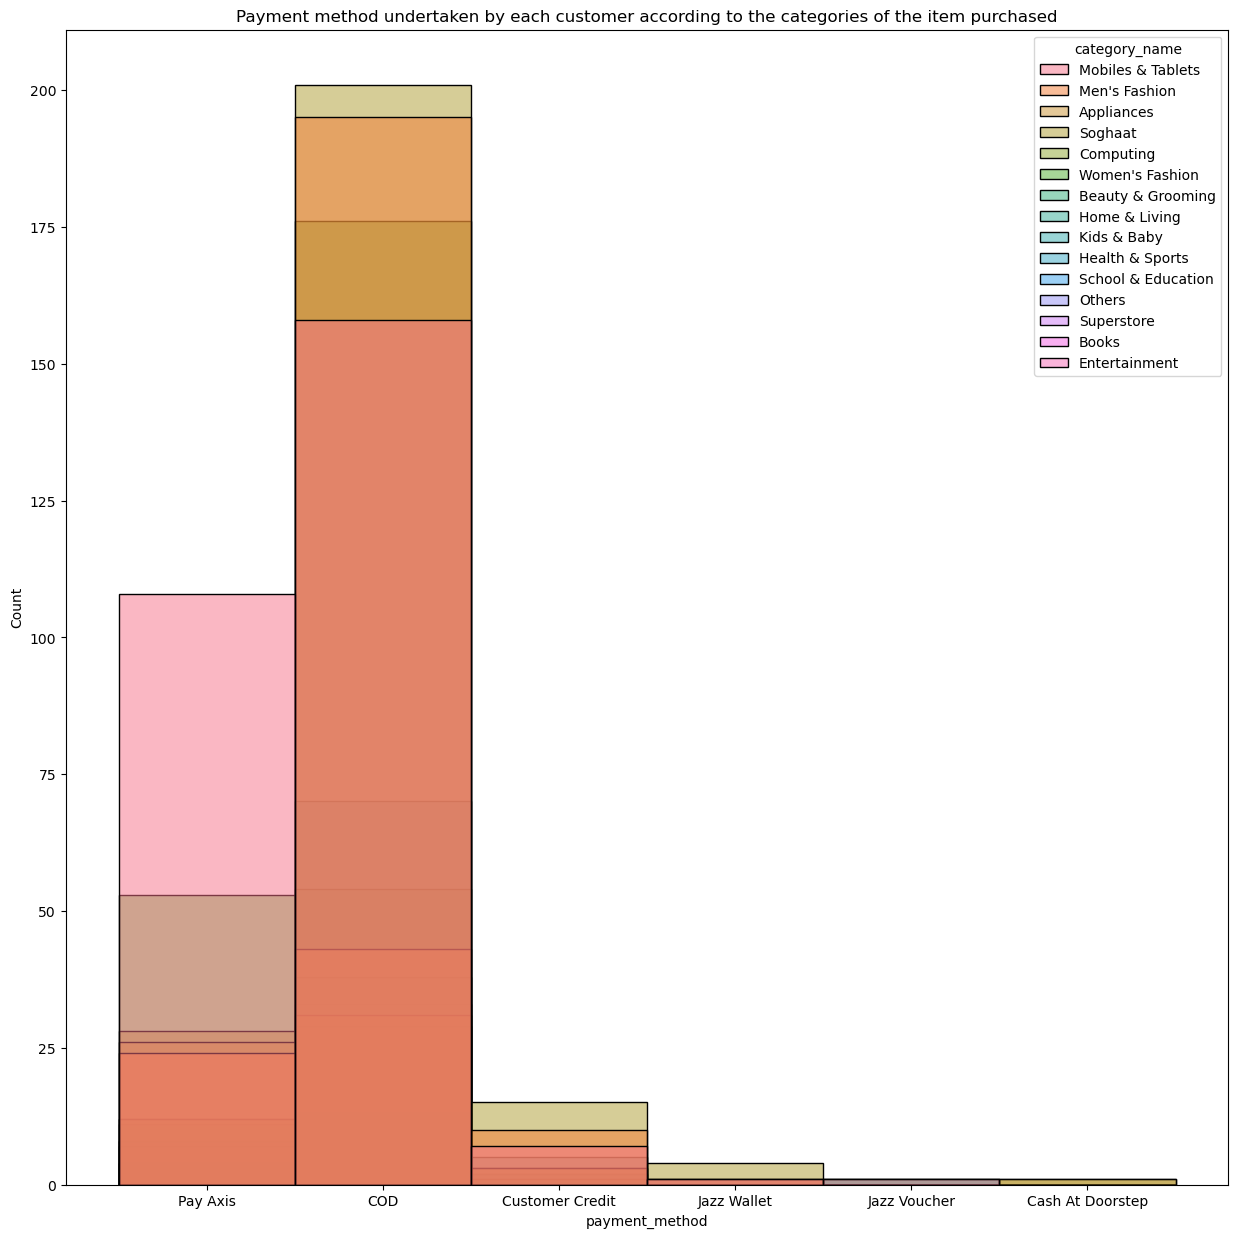

In [100]:
# Analysis of feature:1:- "Category_name" 
# Lets categorize the Payment method undertaken by each customer according to the categories of the item purchased

plt.figure(figsize = (15,15))
plt.title("Payment method undertaken by each customer according to the categories of the item purchased")
sns.histplot(x="payment_method", hue = "category_name", data= e_commerce_data)
plt.show()

#It seems the people have used COD (Cash On Delivery) Payment method for almost all kinds of Purchases

There could be several reasons for this observation:

--> The high frequency of COD across categories might indicate customer trust in this payment method, possibly due to the security of paying after receiving the item. 

--> It could also reflect a market or regional preference where COD is more common due to factors such as limited access to online payment options or customer preference for physical transactions.

--> The histogram suggests that there is little variation in the choice of payment methods across different product categories. This uniformity indicates that factors such as the type of product, price point, or customer demographics might not significantly influence the payment method chosen by customers in this dataset.

--> Businesses might consider focusing on optimizing COD processes since it is a widely used payment method. However, they should also explore strategies to encourage the adoption of other payment methods, such as digital wallets or credit cards, which might offer benefits like quicker payment processing or reduced risk of non-payment.

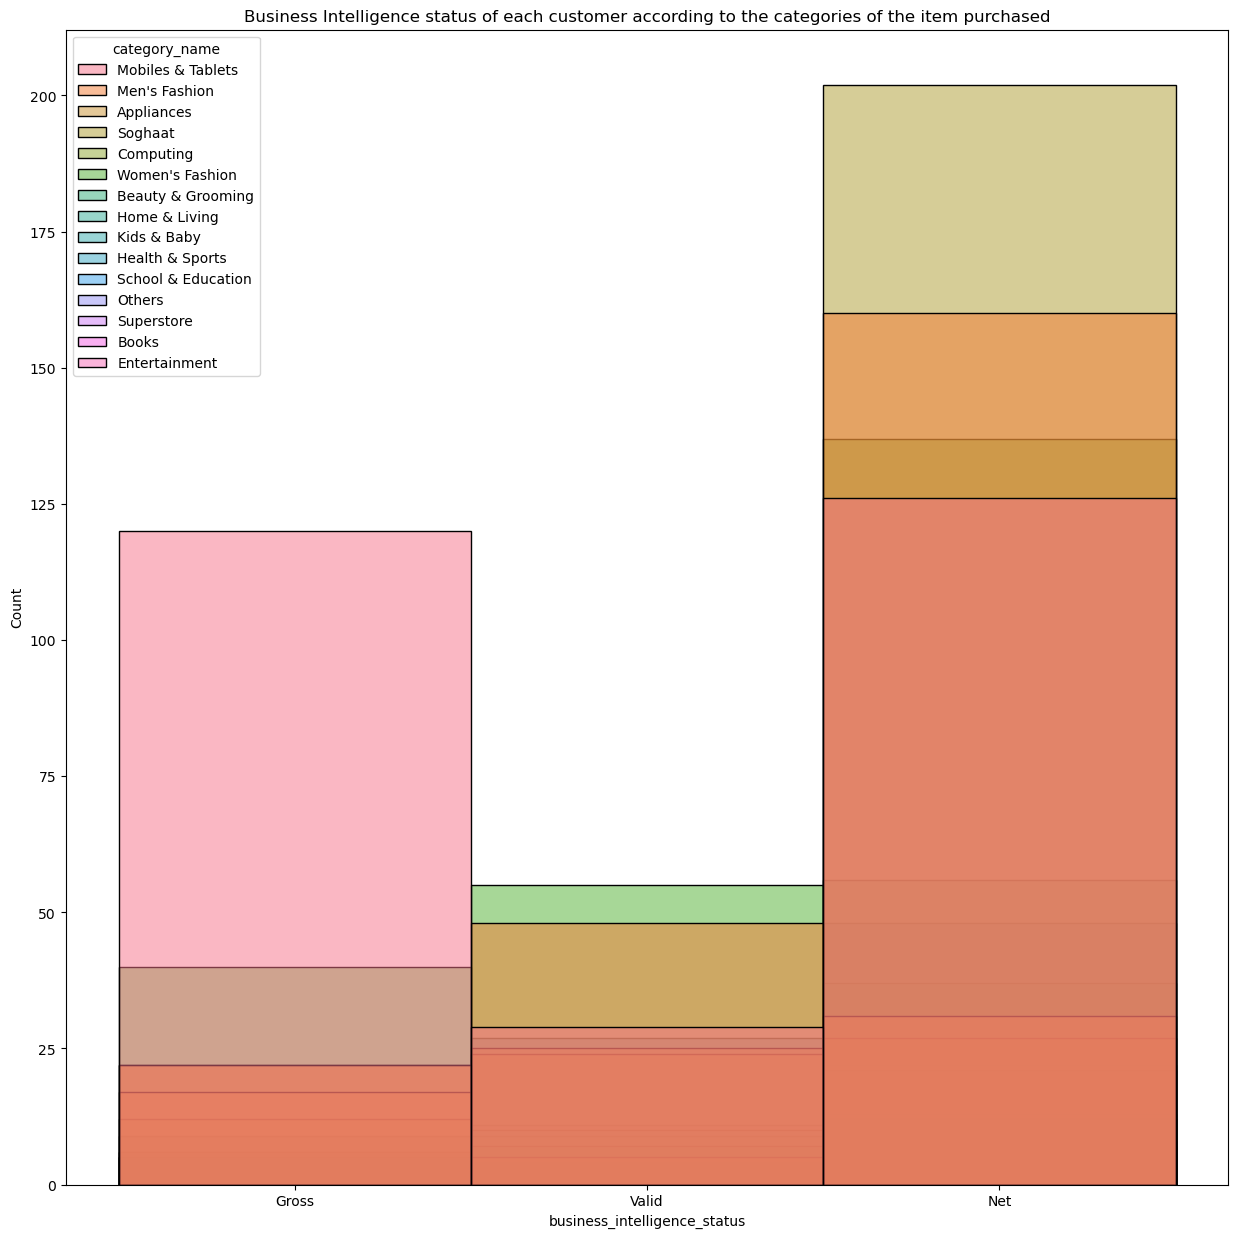

In [101]:
# Analysis of feature:2:- "business_intelligence_status" 
# Lets categorize the BIS undertaken by each customer according to the categories of the item purchased

plt.figure(figsize = (15,15))
plt.title("Business Intelligence status of each customer according to the categories of the item purchased")
sns.histplot(x="business_intelligence_status", hue = "category_name", data= e_commerce_data)
plt.show()

#The observation that most customers fall under the "Net" category and primarily purchase home appliances
# can be justified by several factors related to consumer behavior, product pricing, and e-commerce dynamics.

 Here's an analysis to explain why this trend might occur:

### 1. **Consumer Behavior and Purchasing Patterns**:
   - **Practicality and Necessity**: Home appliances are often considered essential items in households. Products like refrigerators, washing machines, and microwaves are necessities, which drives consistent demand. This demand could lead to higher sales volume in the "Net" category, as these items are less likely to be returned or heavily discounted.
   - **Durability and Longevity**: Home appliances are typically durable goods, meaning they have a longer lifespan and are infrequently purchased. Consumers are more likely to carefully consider these purchases, leading to fewer returns, and thus, more transactions falling under the "Net" category.
  
### 2. **Pricing and Profit Margins**:
   - **Higher Price Points**: Home appliances tend to have higher price points compared to other categories like apparel or electronics accessories. These higher prices can contribute to a significant portion of the net revenue, even if the volume is not as high as smaller, less expensive items.
   - **Lower Return Rates**: The "Net" category in e-commerce often represents sales after returns, discounts, or other deductions. Since home appliances are significant purchases, they may have lower return rates because returning such items can be cumbersome and costly. This leads to more sales being classified as "Net."

### 3. **Promotional and Discount Strategies**:
   - **Targeted Promotions**: Retailers may offer fewer deep discounts on home appliances compared to other categories. This strategy is often employed because the profit margins on these products are already slim due to their high cost. As a result, most sales in this category remain at or near full price, contributing to the "Net" category rather than "Gross."
   - **Limited Discounting**: Since home appliances are big-ticket items, they are less frequently subject to promotional discounts that would reduce the gross revenue. Therefore, the majority of these sales contribute directly to net revenue.

### 4. **E-commerce Dynamics**:
   - **Shipping and Handling**: Home appliances often involve significant shipping and handling costs, which can deter customers from returning the items. This adds to the "Net" category because there are fewer returns and cancellations.
   - **Stable Demand**: Unlike fashion or electronics, where trends change rapidly, home appliances have more stable demand. This stability leads to consistent net sales over time, contributing to the observed trend.

### Conclusion:
The prevalence of home appliance purchases in the "Net" category suggests that customers are making deliberate, well-considered decisions when purchasing these items, leading to fewer returns and more finalized transactions. Additionally, the nature of home appliances as essential, high-value items with less frequent discounting means that their sales are more likely to contribute directly to net revenue.

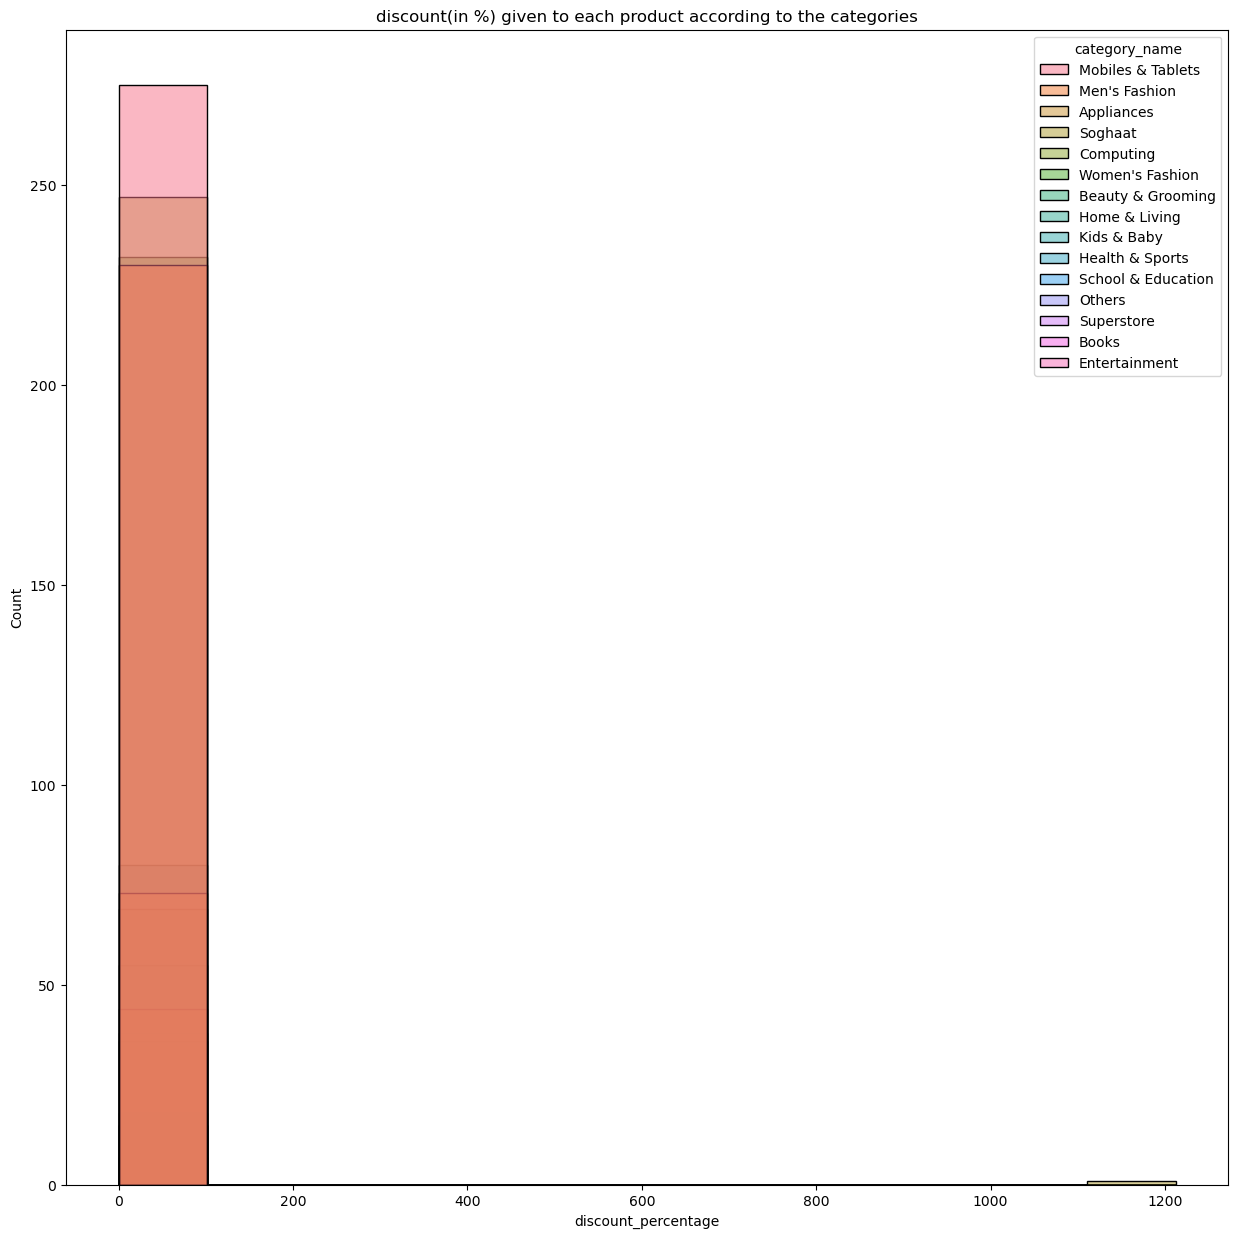

In [102]:
# Analysis of feature:3:- "discount_percentage" 
# Lets categorize the discount(in %) given to each product according to the categories

plt.figure(figsize = (15,15))
plt.title("discount(in %) given to each product according to the categories")
sns.histplot(x="discount_percentage", hue = "category_name", data= e_commerce_data)
plt.show()

#The observation that the discount percentages are higher for the "Mobiles & Tablets" category can be 
# justified by several factors related to the competitive nature of the electronics market, consumer expectations, 
# and product lifecycle.

 Here's an analysis to explain why this trend might occur:

### 1. **Highly Competitive Market**:
   - **Intense Competition**: The market for mobiles and tablets is highly competitive, with numerous brands and models vying for consumer attention. To differentiate their offerings, e-commerce platforms often provide significant discounts to attract customers. This competition drives up the discount percentages for these products.
   - **Frequent Product Releases**: The mobile and tablet industry is characterized by rapid innovation and frequent product launches. New models are released regularly, leading to the need to clear out older inventory. Retailers often offer higher discounts on older models to make room for new stock.

### 2. **Consumer Expectations**:
   - **Price Sensitivity**: Consumers in the mobile and tablet market are often highly price-sensitive. They actively search for the best deals and are more likely to make purchases when significant discounts are offered. Retailers respond to this behavior by offering higher discounts to entice buyers.
   - **Holiday and Sales Events**: Mobiles and tablets are frequently featured in major sales events like Black Friday, Cyber Monday, and other promotional periods. During these events, discounts can be substantial, contributing to the overall higher discount percentages observed throughout the year.

### 3. **Product Lifecycle and Depreciation**:
   - **Rapid Depreciation**: Mobile phones and tablets tend to depreciate quickly as new models are released. This depreciation forces retailers to offer higher discounts to move older inventory, especially when a newer version of a device is launched.
   - **End-of-Life Discounts**: When a product is nearing the end of its lifecycle (i.e., when a manufacturer stops producing or supporting a particular model), retailers may offer steep discounts to clear remaining stock.

### 4. **Promotional Strategies**:
   - **Bundle Deals and Promotions**: Retailers often offer mobiles and tablets as part of bundle deals, where the discount on the individual item might be higher to make the overall package more attractive. This can inflate the discount percentage for these products.
   - **Flash Sales**: E-commerce platforms frequently use flash sales to create urgency, offering substantial discounts on popular mobile and tablet models for a limited time. These sales contribute to the higher average discount percentage in this category.

### 5. **Technology Advancements**:
   - **Obsolescence of Technology**: As technology in mobiles and tablets advances rapidly, older models become outdated more quickly. Retailers offer higher discounts to clear out these outdated models, as they become less appealing to consumers who prefer the latest technology.

### Conclusion:
The higher discount percentages observed for the "Mobiles & Tablets" category are driven by the highly competitive nature of the market, rapid product lifecycle, and consumer behavior that prioritizes discounts and deals. Retailers use these discounts as a strategic tool to attract price-sensitive consumers, clear out older inventory, and remain competitive in a fast-evolving market.

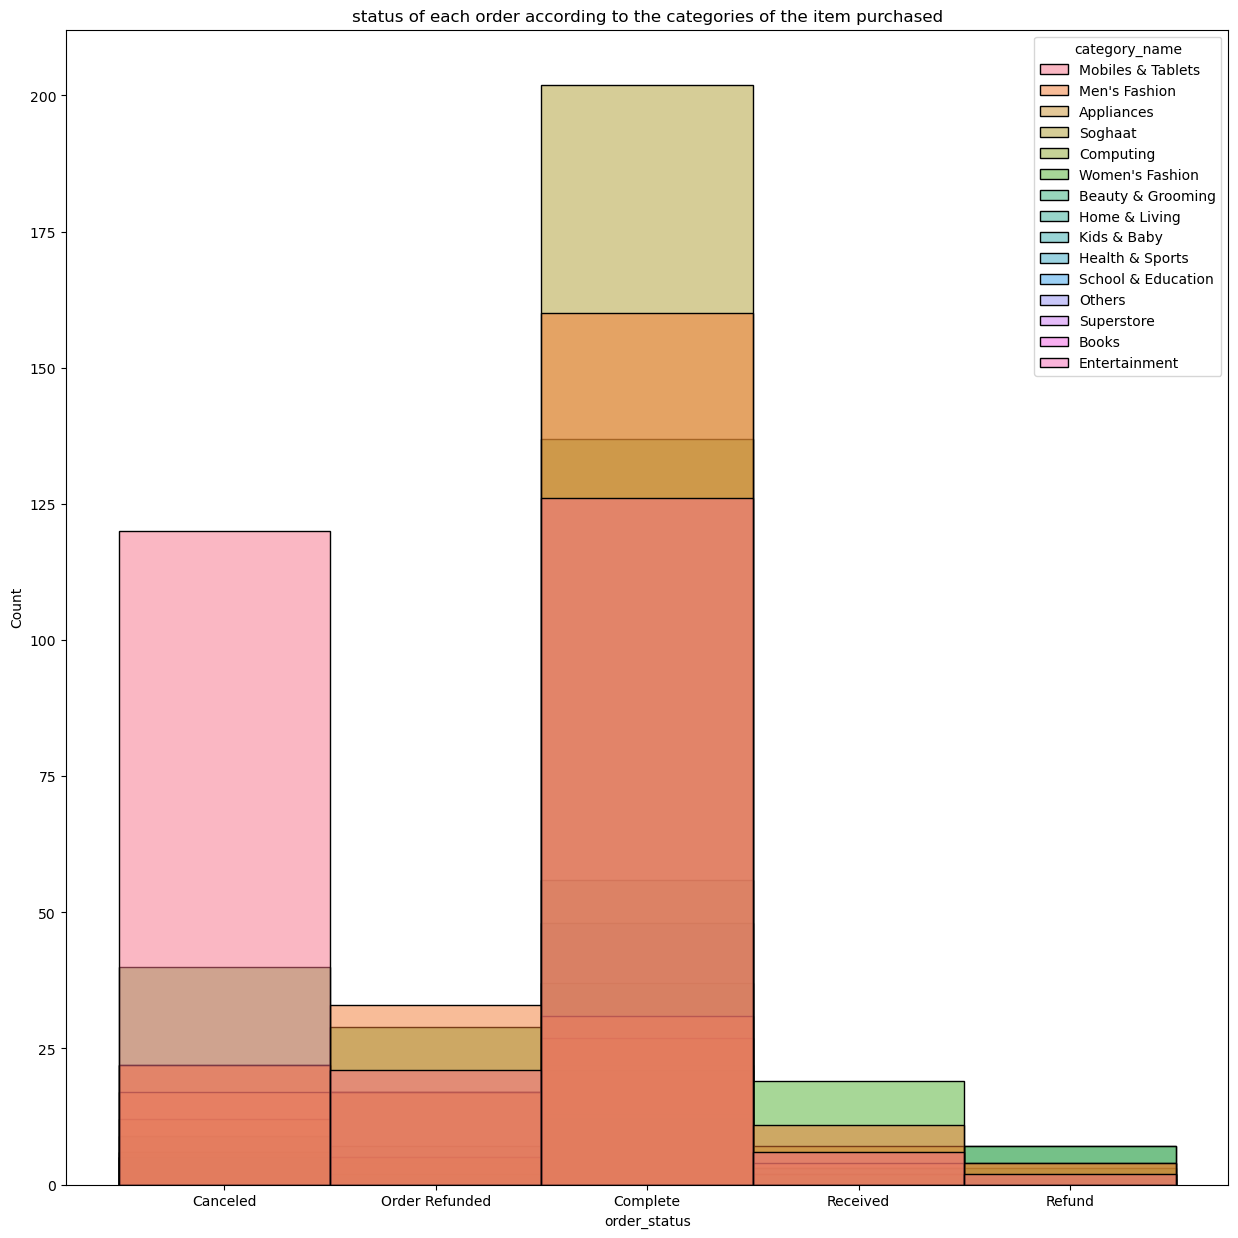

In [103]:
# Analysis of feature:4:- "order_status" 
# Lets categorize the status of the order according to the categories of the item purchased

plt.figure(figsize = (15,15))
plt.title("status of each order according to the categories of the item purchased")
sns.histplot(x="order_status", hue = "category_name", data= e_commerce_data)
plt.show()

#shows more completed orders coming under the categoris: Computing

The observation that more completed orders fall under the "Computing" category can be justified by several factors related to the nature of computing products, consumer purchasing behavior, and the reliability of these items in e-commerce transactions. Here's an analysis to explain why this trend might occur:

### 1. **High Demand and Necessity**:
   - **Essential Products**: Computing products such as laptops, desktops, and accessories are often essential for work, education, and personal use. This necessity drives a consistent demand, leading to a higher number of purchases and, subsequently, a higher number of completed orders in this category.
   - **Remote Work and Education Trends**: The rise of remote work and online education, especially in recent years, has significantly increased the demand for computing devices. This trend ensures that once ordered, these products are more likely to be delivered and used, leading to a higher rate of completed orders.

### 2. **Lower Return Rates**:
   - **Careful Purchase Decisions**: Consumers typically invest more time and consideration when purchasing computing products due to their higher price points and importance. This careful decision-making process reduces the likelihood of returns or cancellations, resulting in more completed orders.
   - **Fewer Impulse Buys**: Computing products are less likely to be impulse buys compared to categories like fashion or small electronics. The deliberate nature of these purchases contributes to a lower rate of returns, cancellations, or exchanges, leading to a higher completion rate.

### 3. **Reliability of Products**:
   - **Established Brands and Product Reliability**: The computing category often includes well-established brands known for reliability and quality. Consumers purchasing these products expect high performance and durability, which reduces dissatisfaction and the need to return the product, resulting in more completed orders.
   - **Longer Product Lifecycles**: Computing products generally have longer lifecycles compared to categories like mobile phones or fashion. This means that once purchased, consumers are likely to keep the products for a longer time, contributing to the order being completed without returns.

### 4. **After-Sales Support and Services**:
   - **Strong After-Sales Support**: Computing products often come with strong after-sales support, including warranties, technical assistance, and easy access to repair services. This support reassures customers, reducing the likelihood of returns or order cancellations, and thus increasing the rate of completed orders.
   - **Business Purchases**: Many orders in the computing category may be made by businesses for employees, where return and exchange policies are less frequently exercised. Business-related orders are typically more straightforward and result in completed transactions.

### 5. **Logistics and Delivery**:
   - **Efficient Supply Chain**: The supply chain for computing products is often highly optimized, with reliable delivery networks and less likelihood of shipping errors. This efficiency in logistics ensures that orders are delivered as expected, contributing to a higher completion rate.
   - **Less Variability in Specifications**: Unlike some categories where customers might have second thoughts about size, color, or style (e.g., fashion), computing products are often purchased based on specific technical specifications that don’t vary much between models. This reduces the chances of returns due to mismatched expectations.

### Conclusion:
The higher number of completed orders in the "Computing" category is likely due to the essential nature of these products, the careful purchasing behavior of consumers, the reliability of the products, and efficient after-sales support. These factors combine to create a scenario where orders are less likely to be returned or canceled, leading to a higher rate of completed orders in this category.

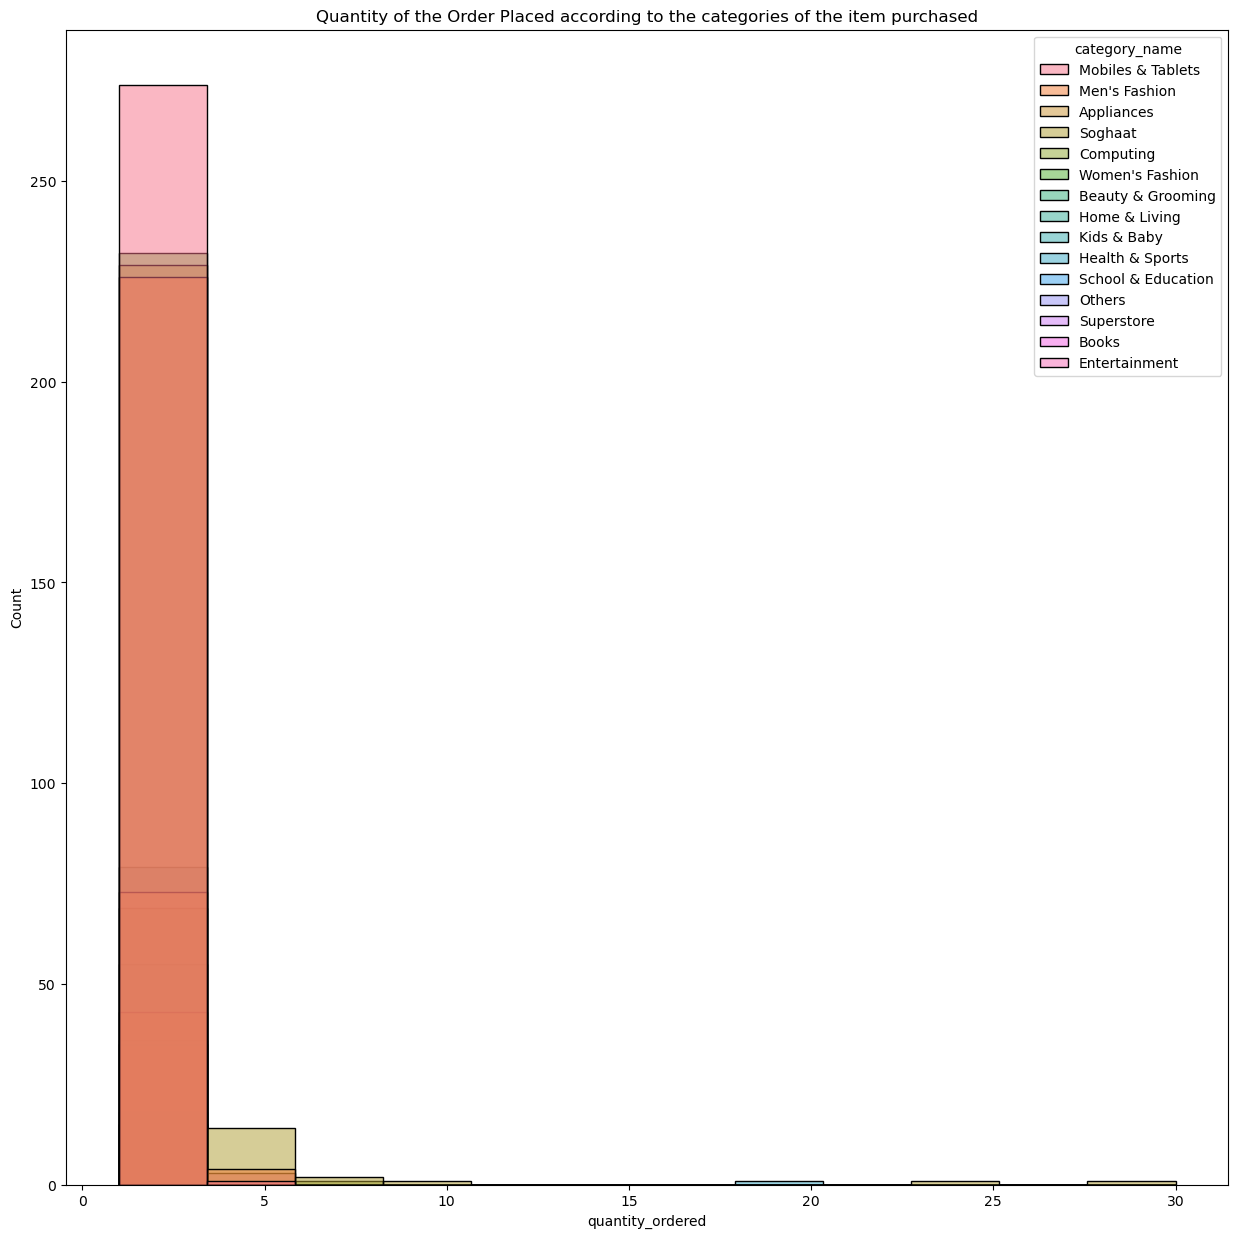

In [104]:
# Analysis of feature:5:- "quantity_ordered" 
# Lets categorize the status of the order according to the categories of the item purchased

plt.figure(figsize = (15,15))
plt.title("Quantity of the Order Placed according to the categories of the item purchased")
sns.histplot(x="quantity_ordered", hue = "category_name", data= e_commerce_data)
plt.show()

#seems the quantity ordered for entertainment is higher comparing to the other categories

The observation that the quantity ordered is higher for the "Entertainment" category compared to other categories can be justified by several factors related to consumer behavior, product characteristics, and the nature of entertainment-related purchases. Here's an analysis to explain why this trend might occur:

### 1. **Nature of Entertainment Products**:
   - **Smaller, Lower-Cost Items**: Entertainment products often include items like DVDs, Blu-rays, video games, books, and digital media accessories. These items are generally lower in cost and smaller in size, making it easier for consumers to purchase multiple units at once. For example, a customer might buy several movies or games in a single order.
   - **Bulk Purchases**: Consumers might buy entertainment products in bulk, especially during sales, holidays, or special events. For instance, someone might purchase an entire series of DVDs, a collection of books, or multiple video games at once.

### 2. **Consumer Behavior and Preferences**:
   - **Gift Purchases**: Entertainment products are popular gifts, particularly during holiday seasons or special occasions. Customers may order multiple units as gifts for family and friends, leading to higher quantities ordered. For example, someone might buy multiple copies of a popular book or game to give as gifts.
   - **Impulse Buys**: Entertainment items, particularly digital downloads or physical media like books and movies, are often purchased on impulse. Consumers may add multiple items to their cart due to special offers, discounts, or simply because they find the products appealing at the moment.

### 3. **Seasonal and Promotional Factors**:
   - **Holiday Sales and Promotions**: The entertainment category often sees significant discounts and promotions during holiday seasons, leading consumers to purchase larger quantities. For example, during Black Friday or Cyber Monday, consumers might take advantage of bundle deals or "buy one, get one free" offers, increasing the quantity ordered.
   - **New Releases**: The entertainment industry frequently releases new products, such as movie collections, game bundles, or special editions of books. Consumers may purchase multiple items from these new releases, particularly if they are collectors or enthusiasts.

### 4. **Subscription and Series-Based Purchases**:
   - **Series and Collections**: Many entertainment products are part of series or collections. Customers might buy an entire season of a TV show, a book series, or a video game franchise all at once, leading to higher quantities ordered.
   - **Subscription Services**: Some entertainment purchases may be tied to subscription services that allow or encourage bulk purchases, such as ordering several months' worth of content at once.

### 5. **Digital vs. Physical Products**:
   - **Ease of Purchase for Digital Content**: Digital entertainment products, such as eBooks, digital movies, or downloadable games, are often purchased in higher quantities because they don’t have physical limitations like storage space or shipping costs. Consumers can easily add multiple digital items to their cart without worrying about delivery or storage, leading to higher quantities ordered.
   - **Low Commitment Purchases**: Digital entertainment products often have lower prices and no shipping costs, making it easier for consumers to justify buying several items at once. This can lead to higher quantities ordered, especially during digital sales or promotions.

### Conclusion:
The higher quantity ordered for the "Entertainment" category is likely due to the nature of these products, which are often low-cost, smaller in size, and lend themselves to bulk or series-based purchases. Consumer behavior, such as purchasing gifts, taking advantage of promotions, and the tendency to buy multiple entertainment items at once, also contributes to this trend. Additionally, the ease of purchasing digital entertainment content further drives the higher quantities ordered in this category.

In [105]:
import pandas as pd

# Assuming e_commerce_data is your DataFrame

# Dropping the specified columns
columns_to_drop = ['created_at', 'stock_keeping_unit', 'sales_commission_code', 'working_date', 'fiscal_year']
e_commerce_data = e_commerce_data.drop(columns=columns_to_drop)

# Display the updated DataFrame
e_commerce_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1435 non-null   int64  
 1   order_status                  1435 non-null   object 
 2   product_price                 1435 non-null   float64
 3   quantity_ordered              1435 non-null   int64  
 4   grand_total                   1435 non-null   float64
 5   increment_id                  1435 non-null   int64  
 6   category_name                 1435 non-null   object 
 7   discount_amount               1435 non-null   float64
 8   payment_method                1435 non-null   object 
 9   business_intelligence_status  1435 non-null   object 
 10  market_value                  1435 non-null   int64  
 11  customer_since                1435 non-null   object 
 12  customer_id                   1435 non-null   int64  
 13  dis

In [106]:
import pandas as pd

# Assuming e_commerce_data is your DataFrame

# Dropping the specified columns
columns_to_drop = ['customer_since']
e_commerce_data = e_commerce_data.drop(columns=columns_to_drop)

# Display the updated DataFrame Information Brief
e_commerce_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1435 non-null   int64  
 1   order_status                  1435 non-null   object 
 2   product_price                 1435 non-null   float64
 3   quantity_ordered              1435 non-null   int64  
 4   grand_total                   1435 non-null   float64
 5   increment_id                  1435 non-null   int64  
 6   category_name                 1435 non-null   object 
 7   discount_amount               1435 non-null   float64
 8   payment_method                1435 non-null   object 
 9   business_intelligence_status  1435 non-null   object 
 10  market_value                  1435 non-null   int64  
 11  customer_id                   1435 non-null   int64  
 12  discount_percentage           1435 non-null   float64
dtypes: 

In [112]:
#since there are some column fields containing categorical values which are string data type, we want to convert alll of them into numerical in order to continue with the further classification

e_commerce_data['order_status'] = e_commerce_data['order_status'].replace({'Canceled': 1, 'Complete': 2, 'Order Refunded': 3, 'Received': 4,'Refund': 5})

e_commerce_data['category_name'] = e_commerce_data['category_name'].replace({'Mobiles & Tablets': 1, "Men's Fashion": 2, 'Appliances': 3, 'Soghaat': 4,'Computing': 5, "Women's Fashion": 6, 'Beauty & Grooming': 7, 'Home & Living': 8, 'Health & Sports': 9, 'School & Education': 10, 'Others' : 11, 'Superstore': 12, 'Books': 13, 'Entertainment': 14, 'Kids & Baby': 15})

e_commerce_data['payment_method'] = e_commerce_data['payment_method'].replace({'Pay Axis': 1, 'COD': 2, 'Customer Credit': 3, 'Jazz Wallet': 4,'Jazz Voucher': 5, 'Cash At Doorstep': 6})

e_commerce_data['business_intelligence_status'] = e_commerce_data['business_intelligence_status'].replace({'Gross': 1, 'Valid': 2, 'Net': 3})

In [113]:
e_commerce_data.info() #to obtain a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1435 non-null   int64  
 1   order_status                  1435 non-null   int64  
 2   product_price                 1435 non-null   float64
 3   quantity_ordered              1435 non-null   int64  
 4   grand_total                   1435 non-null   float64
 5   increment_id                  1435 non-null   int64  
 6   category_name                 1435 non-null   int64  
 7   discount_amount               1435 non-null   float64
 8   payment_method                1435 non-null   int64  
 9   business_intelligence_status  1435 non-null   int64  
 10  market_value                  1435 non-null   int64  
 11  customer_id                   1435 non-null   int64  
 12  discount_percentage           1435 non-null   float64
dtypes: 

In [123]:
import pandas as pd

# Assuming e_commerce_data is your DataFrame

# Round the 'discount_percentage' column to the nearest integer
e_commerce_data['discount_percentage'] = e_commerce_data['discount_percentage'].round().astype(int)

# Display the updated DataFrame
e_commerce_data.head()


,item_id,order_status,product_price,quantity_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,business_intelligence_status,market_value,customer_id,discount_percentage
0,387684,1,96410.0,1,96410.0,100260526,1,0.0,1,1,96410,14153,0
1,387686,1,599.0,2,1198.0,100260527,2,0.0,1,1,1198,31005,0
2,387688,3,1650.0,1,1650.0,100260528,3,0.0,2,2,1650,806,0
3,387682,1,96410.0,1,96410.0,100260525,1,0.0,1,1,96410,13487,0
4,387689,2,1535.0,1,1535.0,100260529,3,0.0,2,3,1535,806,0


In [124]:
e_commerce_data.info() #to obtain a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1435 non-null   int64  
 1   order_status                  1435 non-null   int64  
 2   product_price                 1435 non-null   float64
 3   quantity_ordered              1435 non-null   int64  
 4   grand_total                   1435 non-null   float64
 5   increment_id                  1435 non-null   int64  
 6   category_name                 1435 non-null   int64  
 7   discount_amount               1435 non-null   float64
 8   payment_method                1435 non-null   int64  
 9   business_intelligence_status  1435 non-null   int64  
 10  market_value                  1435 non-null   int64  
 11  customer_id                   1435 non-null   int64  
 12  discount_percentage           1435 non-null   int64  
dtypes: 

In [125]:
#Execute the following code to determine class feature and input feature:
input_features = e_commerce_data.iloc[:,:-1].values #converts the "input_features" subset into a NumPy array.
discount_percentage = e_commerce_data.iloc[:, 12].values #converts the "income" subset into a NumPy array.

In [126]:
print("The input features or values determining discount_percentage given to each order according to the categories in the array given below:")
input_features

The input features or values determining discount_percentage given to each order according to the categories in the array given below:


array([[3.87684e+05, 1.00000e+00, 9.64100e+04, ..., 1.00000e+00,
        9.64100e+04, 1.41530e+04],
       [3.87686e+05, 1.00000e+00, 5.99000e+02, ..., 1.00000e+00,
        1.19800e+03, 3.10050e+04],
       [3.87688e+05, 3.00000e+00, 1.65000e+03, ..., 2.00000e+00,
        1.65000e+03, 8.06000e+02],
       ...,
       [3.89621e+05, 4.00000e+00, 8.00000e+01, ..., 2.00000e+00,
        8.00000e+01, 8.54600e+03],
       [3.89622e+05, 4.00000e+00, 9.45000e+02, ..., 2.00000e+00,
        9.45000e+02, 8.54600e+03],
       [3.89623e+05, 4.00000e+00, 8.50000e+01, ..., 2.00000e+00,
        8.50000e+01, 8.54600e+03]])

In [127]:
print("The output values showing discount_percentage given to each order of all the categories are given below:")
discount_percentage

The output values showing discount_percentage given to each order of all the categories are given below:


array([0, 0, 0, ..., 0, 0, 0])

Now, we want to divide the complete dataset (which is already divided into two - input and output categories) into train dataset and test dataset sop as to continue with the classification and compare the analysis.

--> The test dataset size can be wither float or int, even equal to none.

--> If it is a float, it shows the proportion of the dataset to be included in the test split and should be between 0.0 and 1.0. It will display the entire amount of test samples if it is int. The value is set to the train size's complement if it is None. The test_size will be set to 0.25 if train_size is also None.

--> The train_test_split() function's random state hyper parameter controls the shuffling process. We obtain distinct train and test sets across multiple executions when random_state = None is used. When a fixed value, such as random_state = 0, is applied to it, we obtain the same train and test sets throughout various executions.

--> Features of different sizes and scales are typically present in a dataset. The modeling of a dataset may be impacted by different scales of the data features.

--> Numerical input variables scaled to a standard range yield better results for many machine learning algorithms, including KNN.

--> By deducting the mean and dividing by the standard deviation, standardization shifts the distribution to have a mean of zero and a standard deviation of one, scaling each input variable independently.The training data should be scaled by dividing by the standard deviation and subtracting the mean.

--> The same mean and standard deviation ought to be applied when scaling test data.The training data is subjected to the Python fit_transform() method in order to both scale the data and determine its scaling parameters (that is, the mean and variance of each feature in the training data). Scaling ought to then be implemented for the test data as well. The transform() function

In [128]:
#We should split our data to train and test dataset. You can use the following code for data splitting:

from sklearn.model_selection import train_test_split
input_features_train, input_features_test, discount_percentage_train, discount_percentage_test = train_test_split(input_features, discount_percentage, test_size = 0.4, random_state = 0)


In [129]:
#The Following code standardizes the train and test dataset.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_features_train_set = sc.fit_transform(input_features_train)
input_features_test_set = sc.transform(input_features_test)


Training the model:

It is not necessary to implement Decision Tree code from scratch.Can use DecisionTreeClassifier from scikit learn library

In [130]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(input_features_train_set, discount_percentage_train)

#p in the above code shows the power parameter for the Minkowski metric.When p = 2, this is equivalent to euclidean_distance.

DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluating the model Once the model is trained, we can use the ‘predict’ function on our model tomake predictions on our test data.

In [139]:
#predicting the test set results

discount_percentage_predict = classifier.predict(input_features_test_set)
print(discount_percentage_predict)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0 30  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 50  0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0
  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

Y_predict shows the predicted class (label) for test dataset. Print the real value of labels in test dataset and compare them with predicted values:

In [133]:
print(discount_percentage)

[0 0 0 ... 0 0 0]


In [137]:
#To evaluate the performance of model, you can use the following code:

from sklearn import metrics
accuracy = metrics.accuracy_score(discount_percentage_test, discount_percentage_predict)
print("accuracy:%.2f\n\n"%(accuracy))
confusion_matrix = metrics.confusion_matrix(discount_percentage_test, discount_percentage_predict)
print("Confusion Matrix:")
print(confusion_matrix, '\n\n')
print("------------------------------------------------")
result = metrics.classification_report(discount_percentage_test, discount_percentage_predict)
print("Classification Report:")
print(result)

accuracy:1.00


Confusion Matrix:
[[562   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   2   0   0]
 [  0   1   0   4   0]
 [  0   0   0   0   5]] 


------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       562
           5       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         2
          30       1.00      0.80      0.89         5
          50       1.00      1.00      1.00         5

    accuracy                           1.00       574
   macro avg       0.80      0.76      0.78       574
weighted avg       1.00      1.00      1.00       574



/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model has an overall accuracy of 100%, indicating that it correctly predicts the outcome in 100% of cases.
The precision, recall, and F1-score vary between the two classes, suggesting that the model performs better at identifying the positive class (higher recall for class 1) than the negative class.
The confusion matrix highlights the instances of false positives and false negatives, which can be useful for further analysis and improving the model.

The confusion_matrix function generates a confusion matrix using thegenerated predictions (y_pred) and the true class labels for the test data (y_test).It shows the number of TP, FN, FP and TN.

The classification_report function shows different metrics such as precision,recall, f1-score, etc., for model evaluation

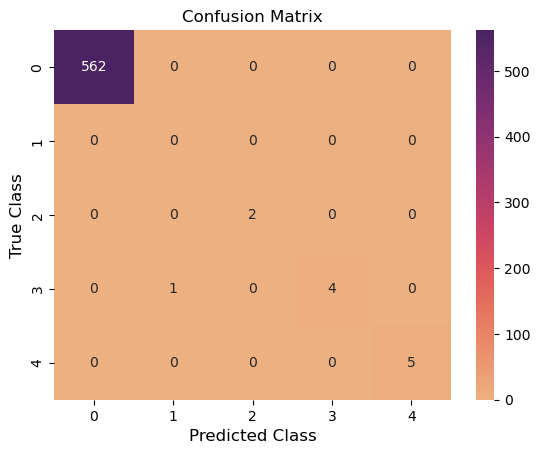

In [138]:
#using seaborn heatmap to visualise the confusion matrix.
visual_confusion_matix = sns.heatmap(confusion_matrix, cmap = 'flare', annot = True, fmt='d')
plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()